<a href="https://colab.research.google.com/github/jonnunez92/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction of Product Sales**

Jonathan Nunez

# Load and Inspect Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sales_df = pd.read_csv("/content/drive/MyDrive/Data Sets for Coding Dojo/sales_predictions.csv")
sales_df.info()
sales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Clean Data

## Rows and Columns

In [ ]:
sales_df.shape

(8523, 12)

## Datatypes

In [ ]:
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Duplicates

In [ ]:
sales_df.duplicated().sum()

0

## Missing Values

In [ ]:
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Clean Missing "Outlet_Size"

In [ ]:
pd.unique(sales_df["Outlet_Size"])

array(['Medium', nan, 'High', 'Small'], dtype=object)

- Outlet Size has very broad categories, so, because they're not very unique, we should keep this data.

In [ ]:
sales_df.groupby(["Outlet_Type","Outlet_Location_Type", "Outlet_Size"], dropna=False)["Outlet_Size"].count()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          528
                   Tier 3                NaN              0
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                                         NaN              0
                   Tier 3                High           932
Supermarket Type2  Tier 3                Medium         928
Supermarket Type3  Tier 3                Medium         935
Name: Outlet_Size, dtype: int64

- Looks like only **Grocery Store**, **Tier 3** and **Supermarket Type1**, **Tier 2** have missing values.

- We'll create a new category for these values called "Missing".


In [ ]:
sales_df["Outlet_Size"].fillna("Missing", inplace=True)

- Check missing values sum

In [ ]:
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
sales_df.groupby(["Outlet_Type", "Outlet_Location_Type", "Outlet_Size"])["Outlet_Size"].count()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small           528
                   Tier 3                Missing         555
Supermarket Type1  Tier 1                Medium          930
                                         Small           930
                   Tier 2                Missing        1855
                                         Small           930
                   Tier 3                High            932
Supermarket Type2  Tier 3                Medium          928
Supermarket Type3  Tier 3                Medium          935
Name: Outlet_Size, dtype: int64

### Clean Missing "Item_Weight"

In [ ]:
pd.unique(sales_df["Item_Weight"]).shape

(416,)

- "Item_Weight" seems to be general enough to keep at only 416 unique items.

In [ ]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Because "Item_Weight" is a numerical value, we should be able to use mean, median, or mode to impute values.
- We'll use median

In [ ]:
median_num = sales_df["Item_Weight"].median()

sales_df["Item_Weight"].fillna(median_num, inplace=True)

In [ ]:
pd.set_option("display.max_rows", 20)
sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Fix of Inconsistent Data in Category

**Item_Fat_Content**

In [ ]:
pd.unique(sales_df["Item_Fat_Content"])

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
sales_df["Item_Fat_Content"] = sales_df["Item_Fat_Content"].replace(["low fat", "LF"], "Low Fat")

In [ ]:
pd.unique(sales_df["Item_Fat_Content"])

array(['Low Fat', 'Regular', 'reg'], dtype=object)

In [ ]:
sales_df["Item_Fat_Content"] = sales_df["Item_Fat_Content"].replace("reg", "Regular")

In [ ]:
pd.unique(sales_df["Item_Fat_Content"])

array(['Low Fat', 'Regular'], dtype=object)

**Item Type**

- Imported numpy to then sort the unique list to better see if any categories were inconsistent

In [ ]:
import numpy as np

a = pd.unique(sales_df["Item_Type"])
np.sort(a)

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

**Outlet Identifier**

In [ ]:
np.sort(pd.unique(sales_df["Outlet_Identifier"]))

array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)

**Outlet Size**

In [ ]:
pd.unique(sales_df["Outlet_Size"])

array(['Medium', 'Missing', 'High', 'Small'], dtype=object)

**Outlet Location Type**

In [ ]:
pd.unique(sales_df["Outlet_Location_Type"])

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

**Outlet Type**

In [ ]:
pd.unique(sales_df["Outlet_Type"])

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

## Summary Statistics for Numerical Columns

In [ ]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Item Weight**

In [ ]:
round(sales_df["Item_Weight"].describe(), 2)

count    8523.00
mean       12.81
std         4.23
min         4.56
25%         9.31
50%        12.60
75%        16.00
max        21.35
Name: Item_Weight, dtype: float64

**Item Visibility**

In [ ]:
sales_df["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

**Item MRP**

In [ ]:
round(sales_df["Item_MRP"].describe(), 2)

count    8523.00
mean      140.99
std        62.28
min        31.29
25%        93.83
50%       143.01
75%       185.64
max       266.89
Name: Item_MRP, dtype: float64

**Outlet Establishment Year**

In [ ]:
round(sales_df["Outlet_Establishment_Year"].describe(), 0)

count    8523.0
mean     1998.0
std         8.0
min      1985.0
25%      1987.0
50%      1999.0
75%      2004.0
max      2009.0
Name: Outlet_Establishment_Year, dtype: float64

**Item Outlet Sales**

In [ ]:
round(sales_df["Item_Outlet_Sales"].describe(), 2)

count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

# Exploratory Data Analysis


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales_df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


## Histogram

- Show the distribution of 'Item_Outlet_Sales' as a dollar and the number of stores.

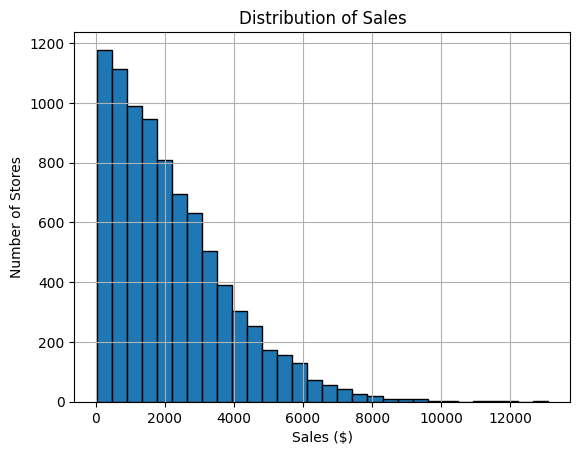

In [ ]:
ax = sales_df['Item_Outlet_Sales'].hist(bins=30, edgecolor='black')
ax.set_title("Distribution of Sales")
ax.set_xlabel("Sales ($)")
ax.set_ylabel("Number of Stores");

In [ ]:
len(sales_df)

8523

In [ ]:
len(sales_df[sales_df['Item_Outlet_Sales'] < 2000])

4667

- A significant portion of stores make less than \$2000.
- It looks like a little more than half of all stores make less than \$2000.

## Boxplot
- We'll compare 3 different columns of data with **Item_Outlet_Sales** to better understand how and where the most sales are coming from.

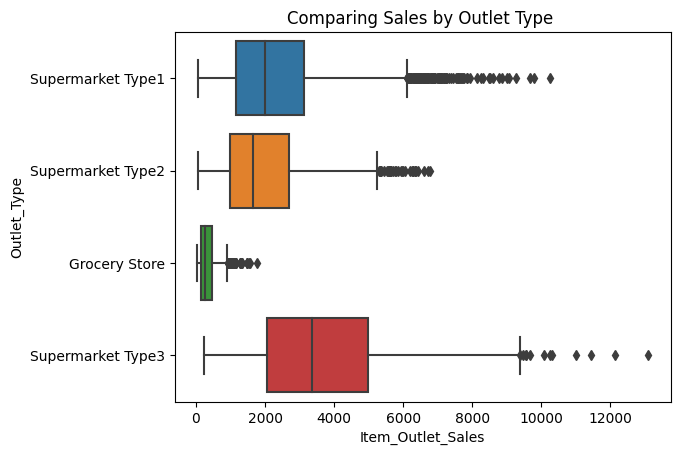

In [ ]:
ax = sns.boxplot(x='Item_Outlet_Sales', y='Outlet_Type', data=sales_df)
ax.set_title("Comparing Sales by Outlet Type ");

- From this chart, we can see that **Supermarket Type3** has the better distribution of sales.
  - It has a higher median number of sales
  - It's IQR is larger and in a higher position
  - And it's max is higher
  

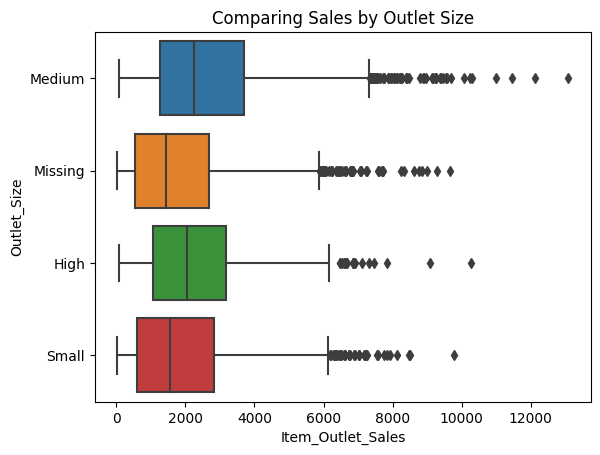

In [ ]:
ax = sns.boxplot(x='Item_Outlet_Sales', y='Outlet_Size', data=sales_df)
ax.set_title("Comparing Sales by Outlet Size");

- From this chart, we can see that **Medium** sized stores have the more sales.
  - The median is higher
  - The IQR is larger and in a higher position
  - And the max is higher as well

- Though we do have a "Missing" category, it looks like it matches up with "Small" outlet size.

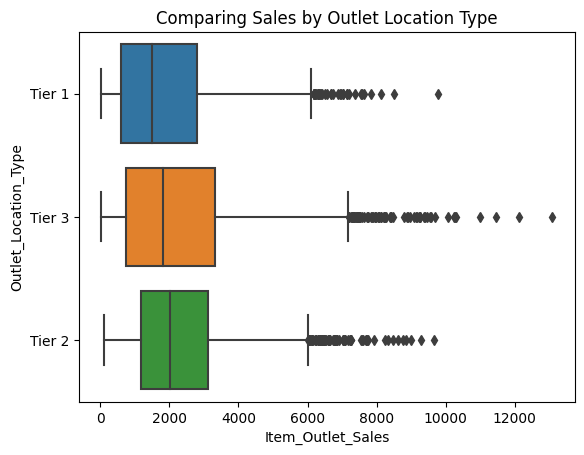

In [ ]:
ax = sns.boxplot(x='Item_Outlet_Sales', y='Outlet_Location_Type', data=sales_df)
ax.set_title("Comparing Sales by Outlet Location Type");

- Though these Boxplots are more similar, it looks like **Tier 3** could be the better "Outlet_Location_Type" by sales.
  - Though the median is lower than **Tier 2**, it's only by a nominal amount
  - The IQR is larger and in a comparably equal or higher range than **Tier 1** or **Tier 2**
  - The max is higher as well

- Taking these three charts together, it looks like the most sales come from stores that are **Supermarket Type3**, **Medium Size**, and **Tier 3**.

## Heatmap
- Here we'll see how pairs of data columns relate to each other.

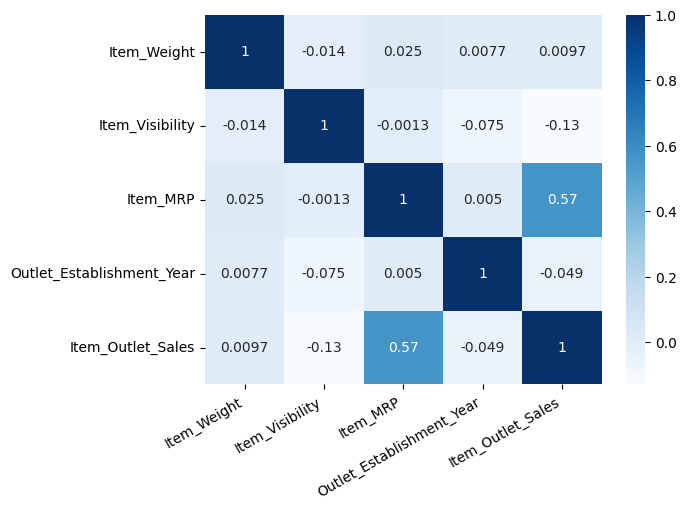

In [ ]:
fig, ax = plt.subplots()
corr = sales_df.corr()
sns.heatmap(corr, cmap='Blues', annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right');

- There is a moderate correlation between **Item_MRP** and **Item_Outlet_Sales**
- Seems to be the higher the price of the item, the higher the sales return.

# Explanatory Data Analysis

## Item MRP by Item Outlet Sales
- **Item_MRP** and **Item_Outlet_Sales** have a moderate positive correlation of 0.57

In [ ]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


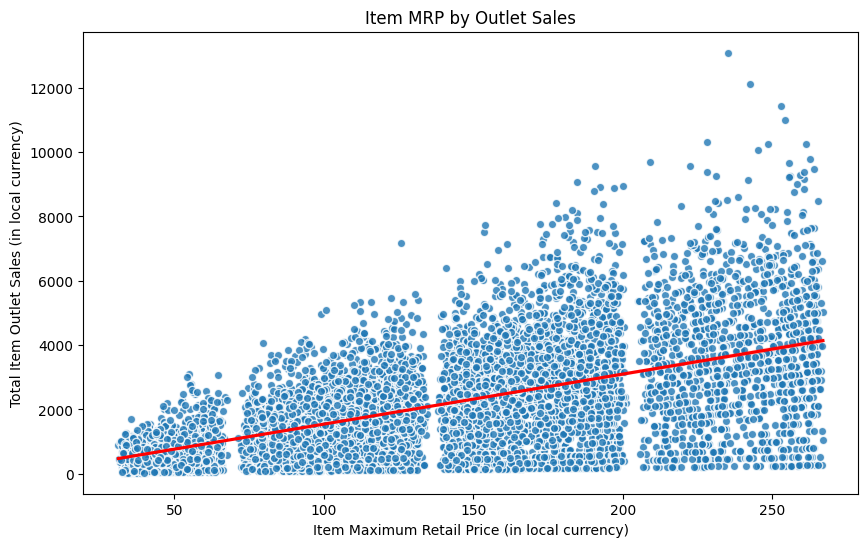

In [ ]:

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(data=sales_df, x='Item_MRP', y='Item_Outlet_Sales', line_kws={'color':'red'}, scatter_kws={'edgecolors':'white'})

ax.set_title("Item MRP by Outlet Sales")
ax.set_xlabel("Item Maximum Retail Price (in local currency)")
ax.set_ylabel("Total Item Outlet Sales (in local currency)");

- Here we can see that as the price of the item goes up, the total return goes up as well
  - Less of those products are sold, but the higher price makes up the difference

## Categorical Plot Comparing Outlet Type, Size, and Location Type by Sales

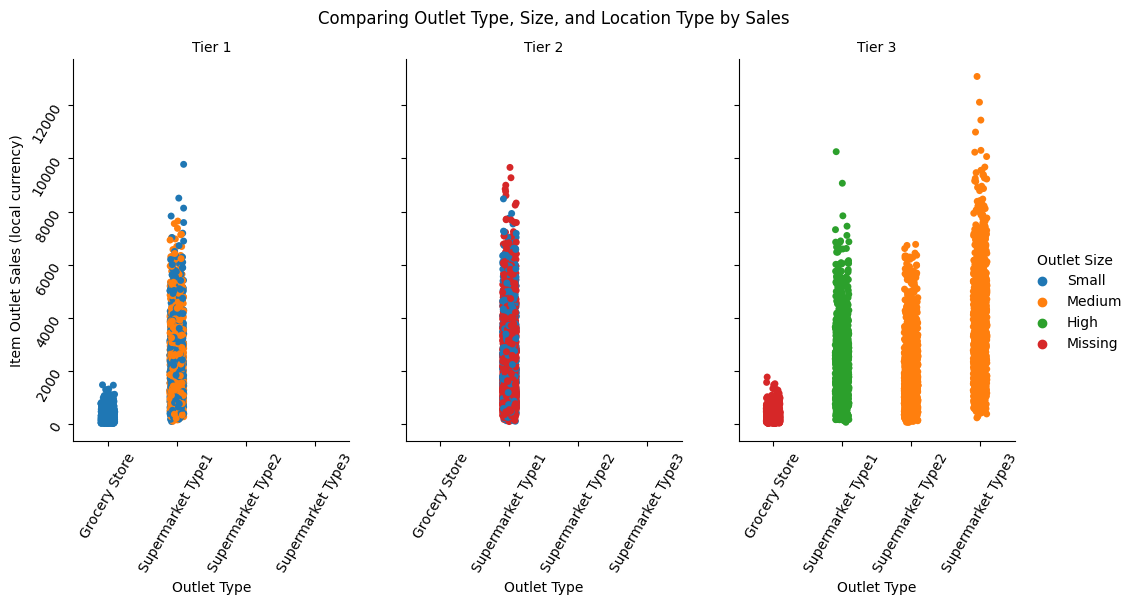

In [ ]:

g = sns.catplot(data=sales_df, x='Outlet_Type', y='Item_Outlet_Sales', 
                col='Outlet_Location_Type', 
                hue='Outlet_Size',
                aspect=.7, 
                order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
                hue_order=['Small', 'Medium', 'High', 'Missing'],
                col_order=['Tier 1', 'Tier 2', 'Tier 3'])
g.tick_params(rotation=60)
g.set_axis_labels("Outlet Type", "Item Outlet Sales (local currency)")
g.set_titles("{col_name}")
g._legend.set_title("Outlet Size")
g.fig.subplots_adjust(top=.88)
g.fig.suptitle('Comparing Outlet Type, Size, and Location Type by Sales');

- This plot is broken up into the *3 Tiers* of **Outlet_Location_Type** with a hue of **Outlet_Size**
- It shows the **Outlet_Type** by **Item_Outlet_Sales**
- We can see that there are much more *Medium* stores
- We can also see that *Tier 3* stores have the most variety of **Outlet_Type**
- We can then see that *Supermarket Type1* is in every *Tier* and has all **Outlet_Sizes** including the *Missing* ones

# Machine Learning

- Will use Machine Learning to make predictions about future sales

## Preprocess

- For this process I'll use the original, uncleaned sales prediction dataset to prevent data leakage

### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets for Coding Dojo/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Drop Duplicates and Fix Inconsistencies in Categorical Data

**Duplicates**

In [ ]:
df.duplicated().sum()

0

**Object Inconsistencies**

In [ ]:
object_type = df.dtypes[df.dtypes == 'object']
for i in object_type.index:
  print(i, '---')
  print(df[i].unique())
  print("")

Item_Identifier ---
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Fat_Content ---
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Item_Type ---
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier ---
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Size ---
['Medium' nan 'High' 'Small']

Outlet_Location_Type ---
['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type ---
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

**Numeric Inconsistencies**

In [ ]:
num_types = df.dtypes[df.dtypes != 'object']
num_types

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df[num_types.index].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [ ]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

In [ ]:
df['Outlet_Establishment_Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Outlet_Establishment_Year
Non-Null Count  Dtype 
--------------  ----- 
8523 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


### Explore Data for Missing Values

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df[['Item_Weight', 'Outlet_Size']].dtypes

Item_Weight    float64
Outlet_Size     object
dtype: object

- **There are missing values we'll need to impute:**

  - Will use *median* for 'Item_Weight' to account for any outliers
  - Will use *most_frequent* for 'Outlet_Size' since it's nominal

### Identify Features(X) and Target(Y)

- Target: 'Item_Outlet_Sales'
- Features: the rest of the relevant variables

In [ ]:
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])
y = df['Item_Outlet_Sales']

### Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Preprocessing Object

#### Instantiate Column Selectors

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

#### Instantiate Transformers

In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

#### Instantiate Pipeline

In [ ]:
num_pipe = make_pipeline(median_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

#### Instantiate ColumnTransformer

In [ ]:
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough', verbose_feature_names_out=False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f49c91c8640>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f49c91c9ae0>)],
                  verbose_feature_names_out=False)

#### Transform Data

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f49c91c8640>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f49c91c9ae0>)],
                  verbose_feature_names_out=False)

In [ ]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

#### Inspect Result

##### View Data Numpy Array

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
print(X_train_processed)
X_train_processed.shape

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 50)


[[ 0.82748547 -0.71277507  1.82810922 ...  0.          1.
   0.        ]
 [ 0.56664432 -1.29105225  0.60336888 ...  0.          1.
   0.        ]
 [-0.12102782  1.81331864  0.24454056 ...  1.          0.
   0.        ]
 ...
 [ 1.12389588 -0.92052713  1.52302674 ...  1.          0.
   0.        ]
 [ 1.77599877 -0.2277552  -0.38377708 ...  1.          0.
   0.        ]
 [ 0.82748547 -0.95867683 -0.73836105 ...  1.          0.
   0.        ]]


(6392, 50)

##### View Pandas DataFrame

In [ ]:
cols = preprocessor.fit(X_train).get_feature_names_out()

In [ ]:
X_train_processed_df = pd.DataFrame(X_train_processed, 
                          columns = cols,
                          index = X_train.index).reset_index(drop=True)

In [ ]:
X_train_processed_df

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.827485,-0.712775,1.828109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.566644,-1.291052,0.603369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.121028,1.813319,0.244541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.158464,-1.004931,-0.952591,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.538870,-0.965484,-0.336460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.821742,4.309657,-0.044657,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.649639,1.008625,-1.058907,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,1.123896,-0.920527,1.523027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,1.775999,-0.227755,-0.383777,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [94]:
print(f"The feature type for all features is: \n\n{X_train_processed_df.dtypes.unique()}")

The feature type for all features is: 

[dtype('float64')]
